<a href="https://colab.research.google.com/github/Yusufahamed/Data-Analysis/blob/main/Project_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [111]:
# Load the sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score

In [3]:
# Load the dataset

df = pd.read_csv("/content/healthcare_classification_dataset.csv")
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Target,Disease_Type,Medication,Hospital,Doctor_Name,Diagnosis
0,NaN,-0.851662,0.857899,-0.978741,1.082112,-0.272410,-0.257300,-0.758971,2.818616,2.482550,...,-0.129034,0.553570,-0.465237,-0.312668,0,Type_A,Type_D,Type_A,Type_B,Type_A
1,0.574723,-0.095604,-0.734910,-0.125879,-0.209953,0.216702,0.391082,0.528777,NaN,0.164269,...,0.671850,0.549527,1.437685,0.191008,1,Type_B,Type_D,Type_B,Type_B,Type_D
2,-0.069281,-0.956500,1.093907,-0.803192,0.359692,0.772623,-1.209123,-0.579760,-1.239365,-1.255464,...,0.848661,0.864307,0.030779,0.777795,1,Type_A,Type_B,Type_B,Type_B,Type_A
3,-1.347343,-0.081551,-0.102038,0.160135,-0.008232,-0.583626,0.490257,-1.297212,-2.245995,-1.824750,...,0.057054,0.574826,0.533463,-0.977269,1,Type_B,Type_D,Type_A,Type_A,Type_A
4,-0.446484,-0.236521,-0.101260,1.460903,1.008752,-1.079932,-1.770774,0.597661,-2.394611,-1.343678,...,-0.955519,-0.161270,1.207006,-0.385715,1,Type_B,Type_D,Type_A,Type_B,Type_A


In [24]:
df.shape

(2100, 21)

In [4]:
df.isnull().sum()

,0
Feature_1,105
Feature_2,0
Feature_3,0
Feature_4,106
Feature_5,0
Feature_6,0
Feature_7,0
Feature_8,107
Feature_9,107
Feature_10,0


In [59]:
org_features = df.iloc[:, :-5]
org_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Target
0,NaN,-0.851662,0.857899,-0.978741,1.082112,-0.272410,-0.257300,-0.758971,2.818616,2.482550,-2.754911,-0.129034,0.553570,-0.465237,-0.312668,0
1,0.574723,-0.095604,-0.734910,-0.125879,-0.209953,0.216702,0.391082,0.528777,NaN,0.164269,0.061033,0.671850,0.549527,1.437685,0.191008,1
2,-0.069281,-0.956500,1.093907,-0.803192,0.359692,0.772623,-1.209123,-0.579760,-1.239365,-1.255464,1.359316,0.848661,0.864307,0.030779,0.777795,1
3,-1.347343,-0.081551,-0.102038,0.160135,-0.008232,-0.583626,0.490257,-1.297212,-2.245995,-1.824750,2.056676,0.057054,0.574826,0.533463,-0.977269,1
4,-0.446484,-0.236521,-0.101260,1.460903,1.008752,-1.079932,-1.770774,0.597661,-2.394611,-1.343678,1.649369,-0.955519,-0.161270,1.207006,-0.385715,1


In [60]:
org_features.shape

(2100, 16)

In [61]:
# Used mean values for all the missing values based on numerical features

imputer = SimpleImputer(strategy='mean')
numerical_features = imputer.fit_transform(org_features)

In [62]:
numerical_features = pd.DataFrame(numerical_features, columns=org_features.columns)

In [63]:
numerical_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Target
0,0.029905,-0.851662,0.857899,-0.978741,1.082112,-0.272410,-0.257300,-0.758971,2.818616,2.482550,-2.754911,-0.129034,0.553570,-0.465237,-0.312668,0.0
1,0.574723,-0.095604,-0.734910,-0.125879,-0.209953,0.216702,0.391082,0.528777,-0.015578,0.164269,0.061033,0.671850,0.549527,1.437685,0.191008,1.0
2,-0.069281,-0.956500,1.093907,-0.803192,0.359692,0.772623,-1.209123,-0.579760,-1.239365,-1.255464,1.359316,0.848661,0.864307,0.030779,0.777795,1.0
3,-1.347343,-0.081551,-0.102038,0.160135,-0.008232,-0.583626,0.490257,-1.297212,-2.245995,-1.824750,2.056676,0.057054,0.574826,0.533463,-0.977269,1.0
4,-0.446484,-0.236521,-0.101260,1.460903,1.008752,-1.079932,-1.770774,0.597661,-2.394611,-1.343678,1.649369,-0.955519,-0.161270,1.207006,-0.385715,1.0


In [64]:
numerical_features.shape

(2100, 16)

In [33]:
dum_features = df.iloc[:, -5:]
dum_features.head()

,Disease_Type,Medication,Hospital,Doctor_Name,Diagnosis
0,Type_A,Type_D,Type_A,Type_B,Type_A
1,Type_B,Type_D,Type_B,Type_B,Type_D
2,Type_A,Type_B,Type_B,Type_B,Type_A
3,Type_B,Type_D,Type_A,Type_A,Type_A
4,Type_B,Type_D,Type_A,Type_B,Type_A


In [27]:
dum_features.shape

(2100, 5)

In [35]:
# Label enconder for the categorical columns

label_encoder = LabelEncoder()
categorical_features = dum_features.apply(label_encoder.fit_transform)

In [36]:
categorical_features.head()

,Disease_Type,Medication,Hospital,Doctor_Name,Diagnosis
0,0,3,0,1,0
1,1,3,1,1,3
2,0,1,1,1,0
3,1,3,0,0,0
4,1,3,0,1,0


In [37]:
categorical_features.shape

(2100, 5)

In [72]:
# Merger the numerical and categorical features in X

join_column = pd.concat([numerical_features, categorical_features], axis=1)

In [73]:
join_column.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Target,Disease_Type,Medication,Hospital,Doctor_Name,Diagnosis
0,0.029905,-0.851662,0.857899,-0.978741,1.082112,-0.272410,-0.257300,-0.758971,2.818616,2.482550,...,-0.129034,0.553570,-0.465237,-0.312668,0.0,0,3,0,1,0
1,0.574723,-0.095604,-0.734910,-0.125879,-0.209953,0.216702,0.391082,0.528777,-0.015578,0.164269,...,0.671850,0.549527,1.437685,0.191008,1.0,1,3,1,1,3
2,-0.069281,-0.956500,1.093907,-0.803192,0.359692,0.772623,-1.209123,-0.579760,-1.239365,-1.255464,...,0.848661,0.864307,0.030779,0.777795,1.0,0,1,1,1,0
3,-1.347343,-0.081551,-0.102038,0.160135,-0.008232,-0.583626,0.490257,-1.297212,-2.245995,-1.824750,...,0.057054,0.574826,0.533463,-0.977269,1.0,1,3,0,0,0
4,-0.446484,-0.236521,-0.101260,1.460903,1.008752,-1.079932,-1.770774,0.597661,-2.394611,-1.343678,...,-0.955519,-0.161270,1.207006,-0.385715,1.0,1,3,0,1,0


In [74]:
join_column.shape

(2100, 21)

In [75]:
join_column.isnull().sum()

,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,0
Feature_7,0
Feature_8,0
Feature_9,0
Feature_10,0


In [76]:
join_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature_1     2100 non-null   float64
 1   Feature_2     2100 non-null   float64
 2   Feature_3     2100 non-null   float64
 3   Feature_4     2100 non-null   float64
 4   Feature_5     2100 non-null   float64
 5   Feature_6     2100 non-null   float64
 6   Feature_7     2100 non-null   float64
 7   Feature_8     2100 non-null   float64
 8   Feature_9     2100 non-null   float64
 9   Feature_10    2100 non-null   float64
 10  Feature_11    2100 non-null   float64
 11  Feature_12    2100 non-null   float64
 12  Feature_13    2100 non-null   float64
 13  Feature_14    2100 non-null   float64
 14  Feature_15    2100 non-null   float64
 15  Target        2100 non-null   float64
 16  Disease_Type  2100 non-null   int64  
 17  Medication    2100 non-null   int64  
 18  Hospital      2100 non-null 

In [84]:
# remove the duplicate

join_column.drop_duplicates(inplace=True)

In [87]:
X = join_column.drop("Target", axis=1)
y = join_column["Target"]

In [88]:
X.shape

(2000, 20)

In [89]:
y.shape

(2000,)

In [90]:
y.head()

,Target
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [92]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Disease_Type,Medication,Hospital,Doctor_Name,Diagnosis
0,0.029905,-0.851662,0.857899,-0.978741,1.082112,-0.272410,-0.257300,-0.758971,2.818616,2.482550,-2.754911,-0.129034,0.553570,-0.465237,-0.312668,0,3,0,1,0
1,0.574723,-0.095604,-0.734910,-0.125879,-0.209953,0.216702,0.391082,0.528777,-0.015578,0.164269,0.061033,0.671850,0.549527,1.437685,0.191008,1,3,1,1,3
2,-0.069281,-0.956500,1.093907,-0.803192,0.359692,0.772623,-1.209123,-0.579760,-1.239365,-1.255464,1.359316,0.848661,0.864307,0.030779,0.777795,0,1,1,1,0
3,-1.347343,-0.081551,-0.102038,0.160135,-0.008232,-0.583626,0.490257,-1.297212,-2.245995,-1.824750,2.056676,0.057054,0.574826,0.533463,-0.977269,1,3,0,0,0
4,-0.446484,-0.236521,-0.101260,1.460903,1.008752,-1.079932,-1.770774,0.597661,-2.394611,-1.343678,1.649369,-0.955519,-0.161270,1.207006,-0.385715,1,3,0,1,0


In [93]:
# Train and test the model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [94]:
# scaler for improve the performance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Model

model = LogisticRegression()

In [96]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [97]:
y_pred = model.predict(X_test_scaled)

In [144]:
acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict= True)

In [145]:
print("Accuracy Score:", acc_score)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

Accuracy Score: 0.8775
Confusion Matrix:
 [[172  33]
 [ 16 179]]
Classification Report:
 {'0.0': {'precision': 0.9148936170212766, 'recall': 0.8390243902439024, 'f1-score': 0.8753180661577608, 'support': 205.0}, '1.0': {'precision': 0.8443396226415094, 'recall': 0.9179487179487179, 'f1-score': 0.8796068796068794, 'support': 195.0}, 'accuracy': 0.8775, 'macro avg': {'precision': 0.879616619831393, 'recall': 0.8784865540963102, 'f1-score': 0.8774624728823202, 'support': 400.0}, 'weighted avg': {'precision': 0.8804985447611401, 'recall': 0.8775, 'f1-score': 0.877408862714206, 'support': 400.0}}


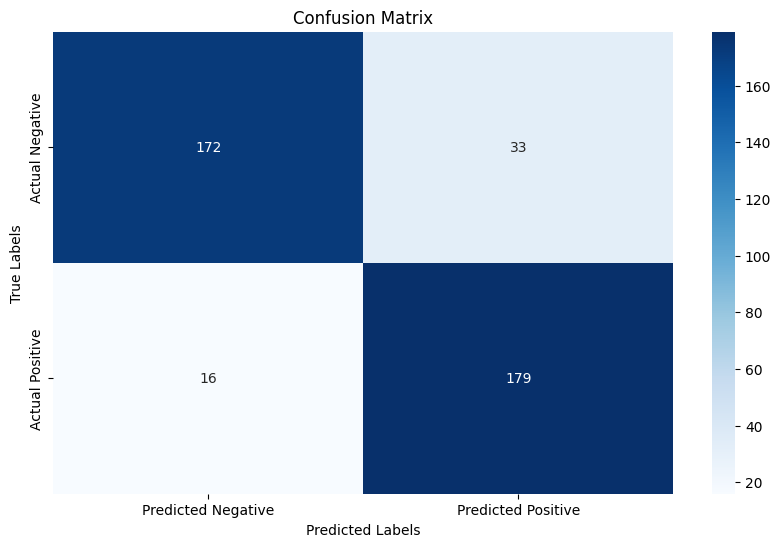

In [127]:
# Visuals for confusion_matrix

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [156]:
cr_df = pd.DataFrame(cr).transpose()

In [161]:
visual_cr = cr_df.iloc[:-1, :-1].head()

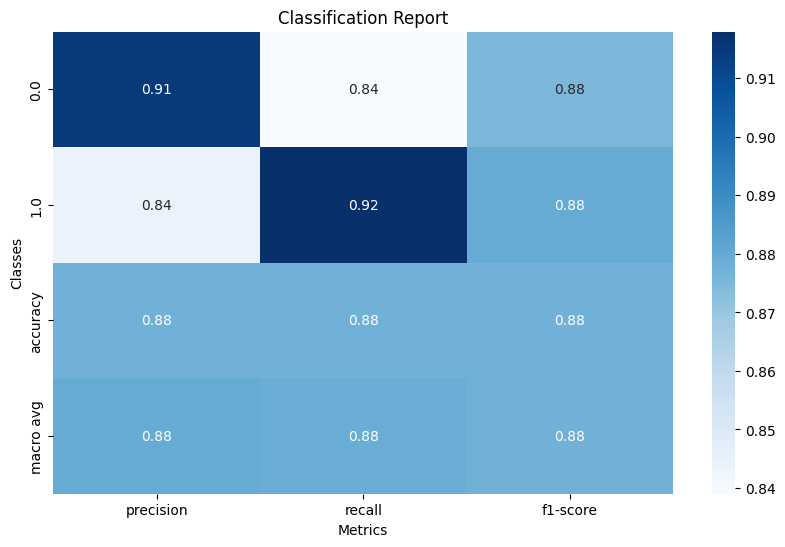

In [164]:
# visual for classification report
plt.figure(figsize = (10,6))
sns.heatmap(visual_cr, annot = True, cmap = "Blues", cbar = True, fmt = ".2f" )
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()